<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
#библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('/datasets/insurance.csv')

In [3]:
print(df.info())
print('-' * 100)

print('ПРОПУСКИ')
print(df.isna().sum())
print('-' * 100)
      
print('ДУБЛИКАТЫ', df.duplicated().sum())
print('-' * 100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None
----------------------------------------------------------------------------------------------------
ПРОПУСКИ
Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64
----------------------------------------------------------------------------------------------------
ДУБЛИКАТЫ 153
----------------------------------------------------------------------------------------------------


In [4]:
df.head(5)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [5]:
#удалим дубликаты
df_duplicated = df[df.duplicated()].head(20)
df = df.drop_duplicates(keep='first').reset_index(drop=True)
print('ДУБЛИКАТЫ', df.duplicated().sum())
print('-' * 100)

ДУБЛИКАТЫ 0
----------------------------------------------------------------------------------------------------


In [6]:
#измениние типа данных у колонки 'Пол'
#df['Пол'] = df['Пол'].astype('bool')

In [7]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811842,1.203425,0.152259
std,0.500049,8.487995,9972.953985,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


<AxesSubplot:>

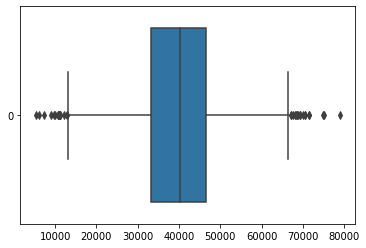

In [8]:
sns.boxplot(data=df['Зарплата'], orient="h")

<AxesSubplot:>

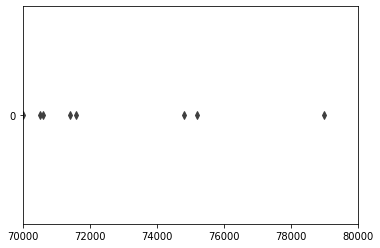

In [9]:
plt.xlim(70000, 80000)
sns.boxplot(data=df['Зарплата'], orient="h")

Все значения реальные, выбросы хоть и есть но в 'Зарплата' редкие выбросы в промежутке 10000, что думаю реально, удалять надобности нет, не слишком огромный выброс. В остальных колонках все ок. Данные готовы к работе. 

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

**Ответ:** не изменится

**Обоснование:** 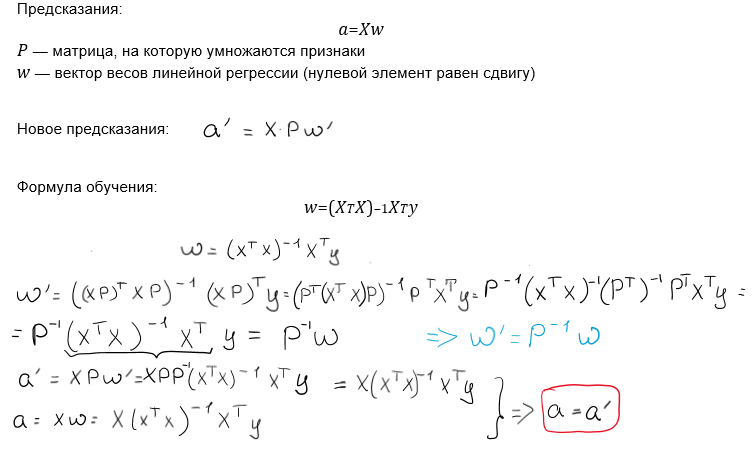

Получается даже если мы умножин на какую либо обратимую матрицу наши признаки значение предсказаний не изменятся. 
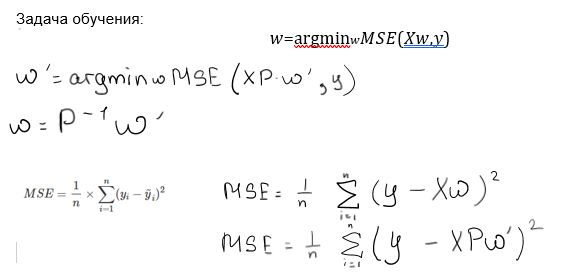

Поменяла местами посути ... 

## Алгоритм преобразования

Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.

**Алгоритм**


Умножим матрицу признаков на обратимую матрицу, в которой все величины сгенерированы случайно.

**Обоснование**

In [10]:
features = df.drop(['Страховые выплаты'], axis=1)  #X
target = df['Страховые выплаты']        #y

In [11]:
#создадим обратимую матрицу
P = np.random.randn(features.shape[1], features.shape[1])
#существование обратной матрицы
try:
    print('существует:', np.linalg.inv(P))
except:
    print('обратная матриа не существует')

существует: [[  5.86713762  -5.36589208 -12.28053975  -1.3322169 ]
 [ -0.59377505   0.01678359   0.77236056   1.067708  ]
 [  0.38645918  -0.83326115  -2.7916168   -0.09629969]
 [ -0.87042158   0.10597306   1.37400787  -0.98867538]]


Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Предсказания:

$$
a = Xw
$$


In [12]:
features_1 = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1)
w = np.linalg.inv(features_1.T.dot(features_1)).dot(features_1.T).dot(target)
a = features_1 @ w
mean_squared_error(target, a)
a

array([ 0.51932881,  0.69230097,  0.09412742, ..., -0.26164511,
       -0.19394186,  0.05044763])

In [13]:
features_P = features @ P 
features_P_1 = np.concatenate((np.ones((features_P.shape[0], 1)), features_P), axis=1)
w_P = np.linalg.inv(features_P_1.T.dot(features_P_1)).dot(features_P_1.T).dot(target)
a_P = features_P_1 @ w_P
mean_squared_error(target, a_P)
a_P

array([ 0.51932879,  0.69230096,  0.09412742, ..., -0.26164512,
       -0.19394188,  0.05044761])

In [14]:
#погрешность
a_P - a

array([-1.56963393e-08, -3.17545790e-09,  8.08643430e-11, ...,
       -5.54298135e-09, -1.61093234e-08, -1.49008244e-08])

**Обоснование**


 Предсказания совпали. качество метрик не поменялось, пгршность совсем маленькая.

## Проверка алгоритма

Rачество линейной регрессии из sklearn не отличается до и после преобразования. Метрика r2=0.43

In [15]:
#2 способ
model_1 = LinearRegression()
model_1.fit(features, target)
predict_1 = model_1.predict(features)
mse_1 = mean_squared_error(target, predict_1)
r2_1 = r2_score(target, predict_1)
print('mse_1', mse_1)
print('r2_1', r2_1)

mse_1 0.12527263826681606
r2_1 0.4302010044852066


In [16]:
model_1_P = LinearRegression()
model_1_P.fit(features_P, target)
predict_1_P = model_1_P.predict(features_P)
mse_1_P = mean_squared_error(target, predict_1_P)
r2_1_P = r2_score(target, predict_1_P)
print('mse_1', mse_1_P)
print('r2_1', r2_1_P)

mse_1 0.1252726382668163
r2_1 0.4302010044852054


2 вариантам так же метрики одинаковые, но посути это одно и тоже что и первый вариант, там мы просто создавали внутри класса линейную регрессию библиотекой sklearn 

In [17]:
#3 способ
class Linear_Regression_2:
    def fit(self, features, target):
        X = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1)
        y = target
        w = (np.linalg.inv(X.T.dot(X)) @ X.T) @ y
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, features):
        return features.dot(self.w) + self.w0
    

In [18]:
model_2 = Linear_Regression_2()
model_2.fit(features, target)
predict_2 = model_2.predict(features)
mse_2 = mean_squared_error(target, predict_2)
r2_2 = r2_score(target, predict_2)
print('mse', mse_2)
print('r2', r2_2)

mse 0.125272638266816
r2 0.4302010044852068


In [19]:
model_2_P = Linear_Regression_2()
model_2_P.fit(features_P, target)
predict_2_P = model_2_P.predict(features_P)
mse_2_P = mean_squared_error(target, predict_2_P)
r2_2_P = r2_score(target, predict_2_P)
print('mse', mse_2_P)
print('r2', r2_2_P)

mse 0.12527263826681626
r2 0.4302010044852057


## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные загружены
- [ ]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [ ]  Указан правильный вариант ответа
    - [ ]  Вариант обоснован
- [ ]  Выполнен шаг 3: предложен алгоритм преобразования
    - [ ]  Алгоритм описан
    - [ ]  Алгоритм обоснован
- [ ]  Выполнен шаг 4: алгоритм проверен
    - [ ]  Алгоритм реализован
    - [ ]  Проведено сравнение качества моделей до и после преобразования